# EE 380L: Data Mining
## Assignment 3

Due: Feb 28 at 11:59 pm  
Total points: 55

You may work in pairs. Only one student per pair needs to submit the assignment on Canvas, but you should include names and UTEIDs for both students.

# Question 1: Ridge and Lasso Regression using R (15 points)
To perform Ridge and Lasso regression in R, we will use the [glmnet](https://cran.r-project.org/web/packages/glmnet/vignettes/glmnet_beta.html#lin) package.

In this question, we use the diabetes dataset again. The dataset can be found at: http://www4.stat.ncsu.edu/~boos/var.select/diabetes.rwrite1.txt

After importing the datasets, use the following code to add additional interaction variables to the features matrix. You should have 65 variables (including 55 interaction variables) and one target variable.

In this question, you will explore the application of Lasso and Ridge regression using  package in R. The following code will split the data into training and testing sets.

(a) (3 pts) Use the ["pairs"](http://stat.ethz.ch/R-manual/R-devel/library/graphics/html/pairs.html) function to see the scatter-plots of pairs of (the original set of 10) variables.

(b) (5 pts) Use glmnet ridge and lasso regression models to do a 5-fold cross validation using [cvTools](https://cran.r-project.org/web/packages/cvTools/index.html) package. For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In R, you can consider this range of values as follows:

      alphas <- 10^seq(from = -2, to = 10, length.out = 100)

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MSE as the scoring metric.

(c) (4 pts) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot (e.g. Fig 6.6 of JW). What do you qualitatively observe when value of the regularization parameter is changed?

(d) (3 pts) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MSE) on the test data for each.

**Answer:**

R script has been attached.

(a)
![title](pairs.png)

(b)  
Best chosen $\lambda$ for ridge is 24.77076  
Best chosen $\lambda$ for lasso is 3.511192

(c)
![title](1.png)
![title](2.png)

(d)  
MSE for lasso is  2880.508  
MSE for ridge is  3075.573





# Question 2: Multi-level Model in Python (18 points)
In this problem, you will explore multi-level model using a python package [PyMC3](https://pymc-devs.github.io/pymc3/index.html#). The dataset "oxboys.csv" will be used in this question.  This dataset contains three fields:
- Individual ID
- Age in years
- Height in cm

(a)  (2 pts) Plot the relationship between height and year, and draw a linearly regressed line ignoring the ID variable.

(b)  (2 pts) Plot the relationship between height and year, but this time, fit a different linear regression for each individual.

(c)  (2 + 4 + 6 pts) Divide the dataset into training and test sets.  The training set contains the first 7 years of the measurements, and the test set contains the rest of the measurements. 
Build three different linear models:
- Global model:  a linear model ignoring the id variable. Pool all data and estimate one common regression model to assess the influence of Age across all Individuals' heights.
- Local model:  a different linear model for each individual i.e., 26 different linear regressions. We are interested in whether different individuals actually follow separate regression models.
- Multilevel model:  Use the [PyMC3](http://pymc-devs.github.io/pymc3/notebooks/GLM-hierarchical.html#Partial-pooling:-Hierarchical-Regression-aka,-the-best-of-both-worlds) package to fit a multilevel model specified as follows:

\begin{align*}
\text{height}_{it} &= \beta_{0i} + \beta_{1i} \text{year}_{it} + \epsilon_{it}\\
\beta_{0i} &= \beta_{00}  + \eta_{0i} \\
\beta_{1i} &= \beta_{10} + \eta_{1i} \\
\end{align*}

Predict the heights for the next 2 years, and calculate the mean squared errors from the three models.

(d)  (2 pts) Briefly state what do $\beta_{00}$ and $\beta_{10}$ mean in this multilevel model.


**Answer:**

(d)  
$\beta_{00}$: The intercept of the group level model(do not consider student difference)  
$\beta_{10}$: The coefficient of the group level model(do not consider student difference), represents the overall height change of students per year change.

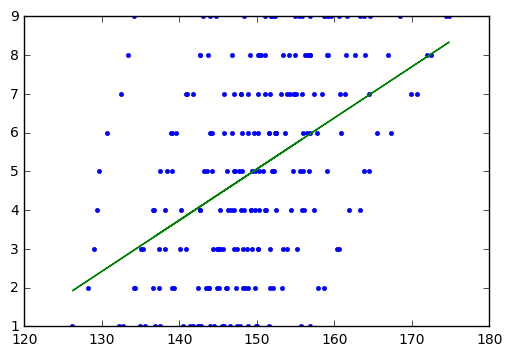

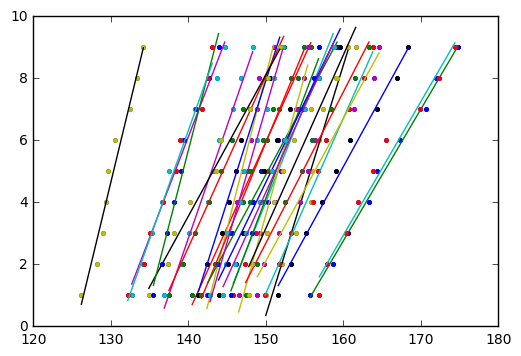

The MSE for global model is 82.0651227694
The MSE for local model is 1.74776730769

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -1,129.6: 100%|██████████| 200000/200000 [00:36<00:00, 5553.95it/s]
Finished [100%]: Average ELBO = -1,138.2
100%|██████████| 2000/2000 [31:55<00:00,  1.34s/it] 


The MSE for hierarchial model is 1.58540529184


In [19]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso,Ridge
from sklearn import metrics
import matplotlib.pyplot as plt
import pylab
import pickle
import pymc3 as pm

df = pd.read_csv('/Users/Amaranth/Downloads/HW3/Q2/oxboys.csv', sep=',',header=None)
regr = linear_model.LinearRegression()

data = df.values

X =  np.array(data[1:,1]).astype(np.float)
Y =  np.array(data[1:,2]).astype(np.float)

# a
m, b = np.polyfit(X, Y, 1)

plt.plot(X, Y, '.')
plt.plot(X, m*X + b, '-')

pylab.show()

# b
plt.plot(X, Y, '.')
for i in range(1,27):
    tmpx = X[9*(i-1) : 9*i]
    tmpy = Y[9*(i-1) : 9*i]

    tmpm, tmpb = np.polyfit(tmpx, tmpy, 1)
    plt.plot(tmpx, tmpy, '.')
    plt.plot(tmpx, tmpm * tmpx + tmpb, '-')

pylab.show()

#c

dataset = np.array(data[1:,:]).astype(np.float)
idx = np.array(data[1:,0]).astype(int)


index = []
i = 0
while i < len(dataset):
    if i%9 != 7 and i%9 != 8:
        index.append(i)
    i += 1

#print index
mask = np.ones(len(dataset), dtype=bool)
mask[index,] = False
train, test = dataset[index], dataset[mask]
idx_train, idx_test = idx[index], idx[mask]
#print train
#print test

#=========82.0651227694

train_age = train[:,2]
train_height = train[:,1]
global_m, global_b = np.polyfit(train_age, train_height, 1)

global_prediction = []
for p in range(26):
    for i in [8,9]:
        global_prediction.append(global_m * i + global_b)

global_res = np.asarray(global_prediction)

global_mse = ((test[:,1]- global_res) ** 2).mean(axis = 0)
print "The MSE for global model is " + str(global_mse)

#=========1.74776730769

local_mse =  0

for i in range(1,27):
    tmpx = train[7*(i-1) : 7*i,2]
    tmpy = train[7*(i-1) : 7*i,1]

    tmpm, tmpb = np.polyfit(tmpx, tmpy, 1)

    #print test[2*(i-1),1], test[2*(i-1)+1,1]

    local_mse += (tmpm * 8 + tmpb - test[2*(i-1),1])**2
    local_mse += (tmpm * 9 + tmpb - test[2*(i-1)+1,1])**2

local_mse /= len(test)
print "The MSE for local model is " + str(local_mse)

#================1.61715757446

student_id = np.array(data[1:,0]).astype(int)
student_height = train[:,1]
student_year = train[:,2]


with pm.Model() as hierarchical_model:
    # Hyperpriors for group nodes
    # mu_a = pm.Normal('mu_a', mu=0., sd=100**2)
    # sigma_a = pm.HalfCauchy('sigma_a', 5)
    # mu_b = pm.Normal('mu_b', mu=0., sd=100**2)
    # sigma_b = pm.HalfCauchy('sigma_b', 5)

    mu_a = pm.Normal('mu_a', mu=0., sd=10)

    sigma_a = pm.HalfCauchy('sigma_a', 5)

    mu_b = pm.Normal('mu_b', mu=0., sd=10)

    sigma_b = pm.HalfCauchy('sigma_b', 5)

    # Intercept for each county, distributed around group mean mu_a
    # Above we just set mu and sd to a fixed value while here we
    # plug in a common group distribution for all a and b (which are
    # vectors of length n_counties).
    a = pm.Normal('a', mu=mu_a, sd=sigma_a, shape=len(student_id))
    # Intercept for each county, distributed around group mean mu_a
    b = pm.Normal('b', mu=mu_b, sd=sigma_b, shape=len(student_id))

    # Model error
    eps = pm.HalfCauchy('eps', 5)

    radon_est = a[idx_train] + b[idx_train] * student_year

    # Data likelihood
    radon_like = pm.Normal('radon_like', mu=radon_est, sd=eps, observed=student_height)

with hierarchical_model:
    trace = pm.sample(2000)

hier_mse =  0

for i in range(1,27):
    mm = np.mean(trace['a'][:,i])
    bb = np.mean(trace['b'][:,i])

    hier_mse += (bb * 8 + mm - test[2*(i-1),1])**2
    hier_mse += (bb * 9 + mm - test[2*(i-1)+1,1])**2

hier_mse /= len(test)

print "The MSE for hierarchial model is " + str(hier_mse)


# d

# Question 3: Sparse Linear Regression (15 points)
In this question, we will explore a couple of modelling techniques for sparse linear regression. For this question,
please make sure you have $numpy/scipy$ and $sklearn$ installed. Each student is to expected to run 3 sparse regression models:
- Lasso (from the sklearn package)
- Automatic Relevance Determination (ARD), available in the sklearn package, or use the provided file $iterative\_ard.py$.
- SubmodRegression. See provided file $submodRegression.py$. The function run submodregression
takes as input the training data, test data and a matrix $C$ which is to be set as identity except for the fMRI dataset for which it is provided as detailed below.

(5 + 5 + 5 pts) You are only expected to run the above 3 models on one of the following 4 datasets. Take the numeral part of your
UTEID, and divide it by 4. Use the remainder to select the corresponding dataset you need to work with:-

0. Simulated data: filename is $simulated.npz$. Use $data = numpy.load(simulated.npz)$ to access the serialized file. Then access features using $data[’X’]$, and target variable using $data[’y’]$. Report $R^2$ for $k = 50, 100, 150$ on 5-fold cross validation. Use $C =identity$ for submodRegression. What happens if you change $C$ to a different diagonal matrix?

1. fMRI data. Use $numpy.load$ like above to load the variables. Remember to use $data[’C’].item()$ to access the sparse csc matrix. Report $R^2 $for sparsity $k = {50, 100, 200}$.

2. KDD cup 2008 dataset from https://archive.ics.uci.edu/ml/datasets/KDD+Cup+1998+Data.
Use $cup98lrn.zip$ for both training/test. Randomly subsample 10, 000 rows to use as the training data, and another 5,000 rows to use as the test data. Replace all missing values with 0. Report $R^2$ for sparsity $k = {50, 100, 200}$. Use $C=identity$ for submodRegression.

3. Blog feedback data.See https://archive.ics.uci.edu/ml/datasets/BlogFeedback for details.
Randomly subsample 10,000 rows to use as the training data, and another 5,000 rows to use as the test data. Report $R^2$ for sparsity $k = {50, 100, 200}$.

In [18]:
import pandas as pd
import numpy as np
import sys,io
from sklearn import datasets, linear_model
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso,Ridge
from sklearn import metrics
import matplotlib.pyplot as plt
import pylab
from sklearn.metrics import r2_score
from numpy import linalg as la
from sklearn.linear_model import ARDRegression
import time

def KFoldCV(k,X,y,model):
    kf = KFold(n_splits=k)
    r2 = 0
    for train,test in kf.split(X):
        model.fit(X[train],y[train])
        estimated = model.predict(X[test])
        r2 += r2_score(y[test], estimated)
    return r2 / k

def check_zero(coef):
    cnt = 0
    for i in coef:
        if i != 0:
           cnt += 1
    return cnt
# 0.72 ===== 50  ====0.581678082762
# 0.08 ===== 100 ====0.988542664916
# 0.0232 === 150 ====0.997704265569
# ========ARD
# 2.6 ===== 50  ====0.842357252129
# 2050 ===== 100 ====0.996391192951
# 6340 === 150 ====0.99753416018
# ========submod
# ===== 50  ====0.916253208384
# ===== 100 ====0.998543862953
# === 150 ====0.998791045141

#=============lasso

data=np.load("simulated.npz")

train_x =  data["X"]
train_y =  data["y"]

lasso = Lasso(alpha = 0.72)
lasso.fit(train_x, train_y)

print "R2 score for Lasso model when K = 50 is " + str(KFoldCV(5,train_x, train_y, lasso))

lasso = Lasso(alpha = 0.08)
lasso.fit(train_x, train_y)

print "R2 score for Lasso model when K = 100 is " + str(KFoldCV(5,train_x, train_y, lasso))

lasso = Lasso(alpha = 0.0232)
lasso.fit(train_x, train_y)

print "R2 score for Lasso model when K = 150 is " + str(KFoldCV(5,train_x, train_y, lasso))

#==========================ard

def iterative_ard(Xtrain, ytrain, noiseVar, eps = 0.1, max_iters = 20, debug=0):
    Xtrain  = np.array(Xtrain)
    ytrain = np.array(ytrain)

    intercept = np.mean(ytrain)
    ytrain  = ytrain - intercept

    n,d = np.shape(Xtrain)
    tnoise = 2*noiseVar

    if(debug > 1):
        print "shape of X = "+ str(n)+" " +str(d)
        print "shape of y = " + str(np.shape(ytrain))

    z = np.ones(d) # init

    diff = 10
    i = 0
    old_gamma = z # to check convergence
    gamma = np.ones(d)

    while( i < max_iters)  and  (diff > eps):
        i = i + 1

#       rewts = np.sqrt(z)
        # step 1 re-weighted lasso
#        weighted_x = Xtrain / rewts #  x[:,i] * z[i]

        laso = Lasso(alpha = tnoise, max_iter= 100000)
        laso_fit = laso.fit(Xtrain/(np.sqrt(z)), ytrain)
        gamma = np.abs(laso.coef_) / z # gamma_i = (1/sqrt(z_i)) * actual_regularized_w = (1/sqrt(z_i))* (1/sqrt(z_i)) * laso_fit.coef_[i]
        # step 1 done
        # step 2, update z

#        Sigma_y = noiseVar * np.eye(n) + np.dot(Xtrain, np.dot(np.diag(gamma), np.transpose(Xtrain) )) # WONT work if d is very large, coz diag(gamma) blows up
        Sigma_y = noiseVar * np.eye(n) + np.dot(Xtrain,  np.transpose(Xtrain * gamma) )

        #sigma_rank = la.matrix_rank(Sigma_y)
#         if(debug > 0 ):
#             print "rank of Sigma_y = %d" %(sigma_rank)

#        if(sigma_rank == n):
        if(0==1): # never run actual inverse
            z = np.dot(la.inv(Sigma_y), Xtrain)
        elif(1==2): # older slower code
            for j in range(d):
                SigmaInvX = la.solve(Sigma_y, Xtrain[:,j])
                z[j] = np.dot(Xtrain[:,j], SigmaInvX)
                if(z[j] <= 0):
                    if(debug > 0):
                        print "Zj <= 0 for j = %d, Zj = %f" %(j, z[j])
                    z[j] = 0.0001
        else:
            InvsigmaX = la.solve(Sigma_y, Xtrain)
            XtInvsigmaX = np.array(Xtrain) * np.array(InvsigmaX) # hadamard product
            z = np.array(np.sum(XtInvsigmaX, 0)).ravel()
            qq = np.where(z <= 0)[0]
            z[qq] = 0.0001
        # step 2 done

        # book keeping
        diff = la.norm(gamma - old_gamma, 2)
        old_gamma = np.array(gamma)
        if(debug > 0):
            print "Iter %d change=%f" %(i, diff)

    # compute w to return

#   Sigma_y = noiseVar * np.eye(n) + np.dot(Xtrain, np.dot(np.diag(gamma), np.transpose(Xtrain) ))
    Sigma_y = noiseVar * np.eye(n) + np.dot(Xtrain,  np.transpose(Xtrain * gamma) )
    SigmaInvY = la.solve(Sigma_y, ytrain)
    XTSigmaInvY = np.dot(np.transpose(Xtrain), SigmaInvY)
#    w = np.dot(np.diag(gamma),XTSigmaInvY)
    w = gamma * XTSigmaInvY
    return(intercept,w, gamma)

# trial
noiseVar = 0.01
n=500
d= 10

x = train_x
w = np.random.normal(10,1,size=d)
y = train_y

t1 = time.time()

print "Running iterative ard"
(tmp, witer,gamma) = iterative_ard(x, y, noiseVar)
t2 = time.time(
               )
print "Running scikit ARD"
ard = ARDRegression(compute_score=True, threshold_lambda = 2.6)
ard.fit(x, y)

print "R2 score for Lasso model when K = 50 is " + str(KFoldCV(5, train_x, train_y, ard))

print "Running scikit ARD"
ard = ARDRegression(compute_score=True, threshold_lambda = 2050)
ard.fit(x, y)

print "R2 score for Lasso model when K = 100 is " + str(KFoldCV(5, train_x, train_y, ard))

print "Running scikit ARD"
ard = ARDRegression(compute_score=True, threshold_lambda = 6340)
ard.fit(x, y)

print "R2 score for Lasso model when K = 150 is " + str(KFoldCV(5, train_x, train_y, ard))
#====================submod

from Solver import solvePosteriorPrecisionSparseGreedy

def run_submodregression(Xtrain, ytrain, k, sigma=1):
    r = np.dot(np.transpose(Xtrain), ytrain)/sigma
    C = np.eye(np.shape(Xtrain)[1])

    diag_xTx = np.array([0.0] * np.shape(Xtrain)[1])
    for ii in range(len(diag_xTx)):
        diag_xTx[ii] = np.dot(Xtrain[:, ii], Xtrain[:, ii])
    print "Running submod"

    save_stdout = sys.stdout
    sys.stdout = io.BytesIO()
    
    where1, pmu = solvePosteriorPrecisionSparseGreedy(X = Xtrain, C = C, k = k, r=r, noiseVar=sigma, diag_xTx = diag_xTx, debug=0,opt_dict=None)

    sys.stdout = save_stdout
    
    beta = np.zeros(np.shape(Xtrain)[1])
    beta[where1] = pmu
    return beta

def kFolds_r2(submod, train_x, train_y):

    submod_model = Lasso()
    submod_model.fit(train_x,train_y)
    submod_model.coef_ = submod

    r2 = 0
    kf = KFold(n_splits=5)
    for train,test in kf.split(train_x):
        estimated = submod_model.predict(train_x[test])
        r2 += r2_score(train_y[test], estimated)
    return r2 / 5


submod = run_submodregression(train_x, train_y, 50)

print "R2 score for Submod model when K = 50 is " + str(kFolds_r2(submod, train_x, train_y))

submod = run_submodregression(train_x, train_y, 100)

print "R2 score for Submod model when K = 100 is " + str(kFolds_r2(submod, train_x, train_y))

submod = run_submodregression(train_x, train_y, 150)

print "R2 score for Submod model when K = 150 is " + str(kFolds_r2(submod, train_x, train_y))


R2 score for Lasso model when K = 50 is 0.581678082762
R2 score for Lasso model when K = 100 is 0.988542664916
R2 score for Lasso model when K = 150 is 0.997704265569
Running iterative ard
Running scikit ARD
R2 score for Lasso model when K = 50 is 0.842357252129
Running scikit ARD
R2 score for Lasso model when K = 100 is 0.996391192951
Running scikit ARD
R2 score for Lasso model when K = 150 is 0.99753416018
Running submod
R2 score for Submod model when K = 50 is 0.916253208384
Running submod
R2 score for Submod model when K = 100 is 0.998543862953
Running submod
R2 score for Submod model when K = 150 is 0.998791045141


# Question 4: Finding Decision Boundary (7 points)
(1) (3 pts) Suppose samples in $R^2$ (the two-dimensional Cartesian space) are being obtained from two classes,
C1 and C2, both of which are normally distributed with means at (1.5, 1) and (1, 1.5) respectively.
The covariance matrix for each class is the same:
$$\Sigma_1 = \Sigma_2 = \begin{bmatrix} 4 & 0 \\ 0 & 4
\end{bmatrix}$$

If the priors of C1 and C2 are 4/7 and 3/7 respectively, what is the ideal (i.e. Bayes Optimal)
decision boundary? (derive the equation for this boundary)

Answer:

By using the formula given on the slides. We have the following.

$$ln(P(x|C_{1})) + ln(P(C_{1}))  =  ln(p(x|C_{2})) + ln(P(C_{2}))\\
-\frac{1}{2}\begin{bmatrix}
 x_{1}-1.5 &  x_{2}-1
\end{bmatrix}\begin{bmatrix}
\frac{1}{4} & 0\\ 
 0 & \frac{1}{4} 
\end{bmatrix}\begin{bmatrix}
x_{1}-1.5\\ x_{2}-1
\end{bmatrix} + ln(\frac{4}{7}) = 
-\frac{1}{2}\begin{bmatrix}
 x_{1}-1 &  x_{2}-1.5
\end{bmatrix}\begin{bmatrix}
\frac{1}{4} & 0\\ 
 0 & \frac{1}{4} 
\end{bmatrix}\begin{bmatrix}
x_{1}-1\\ x_{2}-1.5
\end{bmatrix} + ln(\frac{3}{7}) \\
-\frac{1}{8}((x_{1}-1.5)^{2}+(x_{2}-1)^{2}) + ln(\frac{3}{7}) = -\frac{1}{8}((x_{1}-1)^{2}+(x_{2}-1.5)^{2})+ ln(\frac{4}{7}) $$

(2) (4 pts) Suppose the cost of misclassifying an input actually belonging to C2 is twice as expensive as
misclassifying an input belonging to C1. Correct classification does not incur any cost. If the
objective is to minimize the expected cost rather than expected misclassification rate, what would
be the best decision boundary? (obtain the equation describing this boundary).

Answer:

By using the formula given on the slides. We have the following.

$$\frac{1}{4\pi}exp\{-\frac{1}{8}((x_{1}-1.5)^{2}+(x_{2}-1)^{2})\}\cdot \frac{4}{7} = \frac{1}{8\pi}exp\{-\frac{1}{8}((x_{1}-1)^{2}+(x_{2}-1.5)^{2})\}\cdot \frac{3}{7} \\
ln(2)-\frac{1}{8}((x_{1}-1.5)^{2}+(x_{2}-1)^{2}) + ln(\frac{4}{7}) = -\frac{1}{8}((x_{1}-1)^{2}+(x_{2}-1.5)^{2})+ ln(\frac{3}{7})
$$